# EnvErgo project
- [ResearchGate link](https://www.researchgate.net/project/Isokinetic-measurements-and-musculoskeletal-modelling-for-ergonomics)

# Anthropometry Analysis

In [1]:
# libraries
import envergo  # local functions (see mvc/ folder)
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks")

In [2]:
df = pd.read_excel('./data/Anthropo_MTL.xlsx').dropna()
# set participant pseudo as index
df.set_index('Subject', inplace=True)
# remove unwanted string in Laterality column
df['Laterality'].replace(regex=True, inplace=True, to_replace=r"'", value=r'')
# print head
df.tail()

,Location,Age,Laterality,Height (m),Weight (kg),IMC,PA (h/sem),Trunk_length,Arm_length,Forearm_length,Hand_length,Pelvis_width,Hand_width
Subject,,,,,,,,,,,,,
CHMI29011992,montreal,1992,R,1.710,87.00,29.75,0.5,0.440,0.265,0.23,0.185,0.190,0.0450
BEMI16091980,montreal,1980,L,1.730,87.00,29.06,2.0,0.570,0.280,0.27,0.210,0.185,0.0420
ANMA08101983,montreal,1983,L,1.700,76.00,26.30,1.0,0.490,0.300,0.23,0.170,0.075,0.0110
HAAL30041963,montreal,1963,R,1.708,73.65,25.19,5.0,0.425,0.300,0.24,0.177,0.080,0.0200
CAJU22031991,montreal,1991,R,1.790,96.00,29.96,2.5,0.510,0.330,0.27,0.170,0.115,0.0275


## 1. Normality tests (Shapiro-Wilk test)
- The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
- It is reputadely more well suited to smaller datasets.

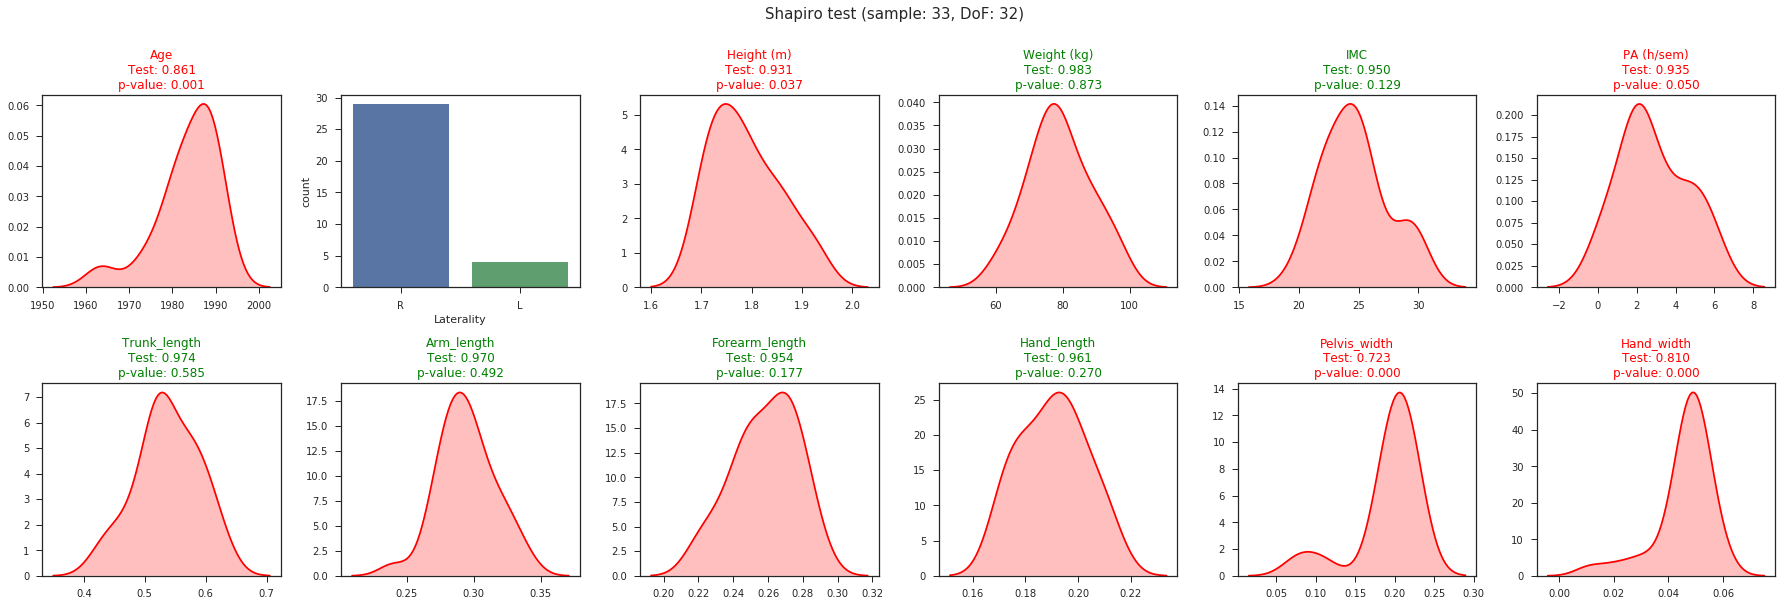

In [98]:
fig, axs = plt.subplots(2, 6, figsize=(25, 8))
# get numeric columns
numeric_col = df.dtypes[df.dtypes != "object"].index 

for ivar, ax in zip(df.drop('Location', axis=1), axs.ravel()):
    if ivar in numeric_col:
        # normality test
        test = scipy.stats.shapiro(df[ivar])
        color = 'g' if test[1] > 0.05 else 'r'
        ax.set_title('{}\nTest: {:.3f}\np-value: {:.3f}'.format(ivar, test[0], test[1]), color=color)
        sns.kdeplot(df[ivar], shade=True, color="r", ax=ax)
        ax.legend_.remove()
    else:
        sns.countplot(x=ivar, data=df, ax=ax)
        
fig.tight_layout()
fig.suptitle('Shapiro test (sample: {}, DoF: {})'.format(df[ivar].size, df[ivar].size - 1), y=1.05, fontsize=15)
plt.show()

## Summary

- variables that don't follow normal distribution: `Age`, `Height`, `PA`, `Pelvis_width` and `Hand_width`

## 2. Are the france-canada groups homogeneous? (Kolmogorov-Smirnov test)
The Kolmogorov-Smirnov test can be applied more broadly than Shapiro, since it is comparing any two distributions against each other, not necessarily one distriubtion to a normal one.

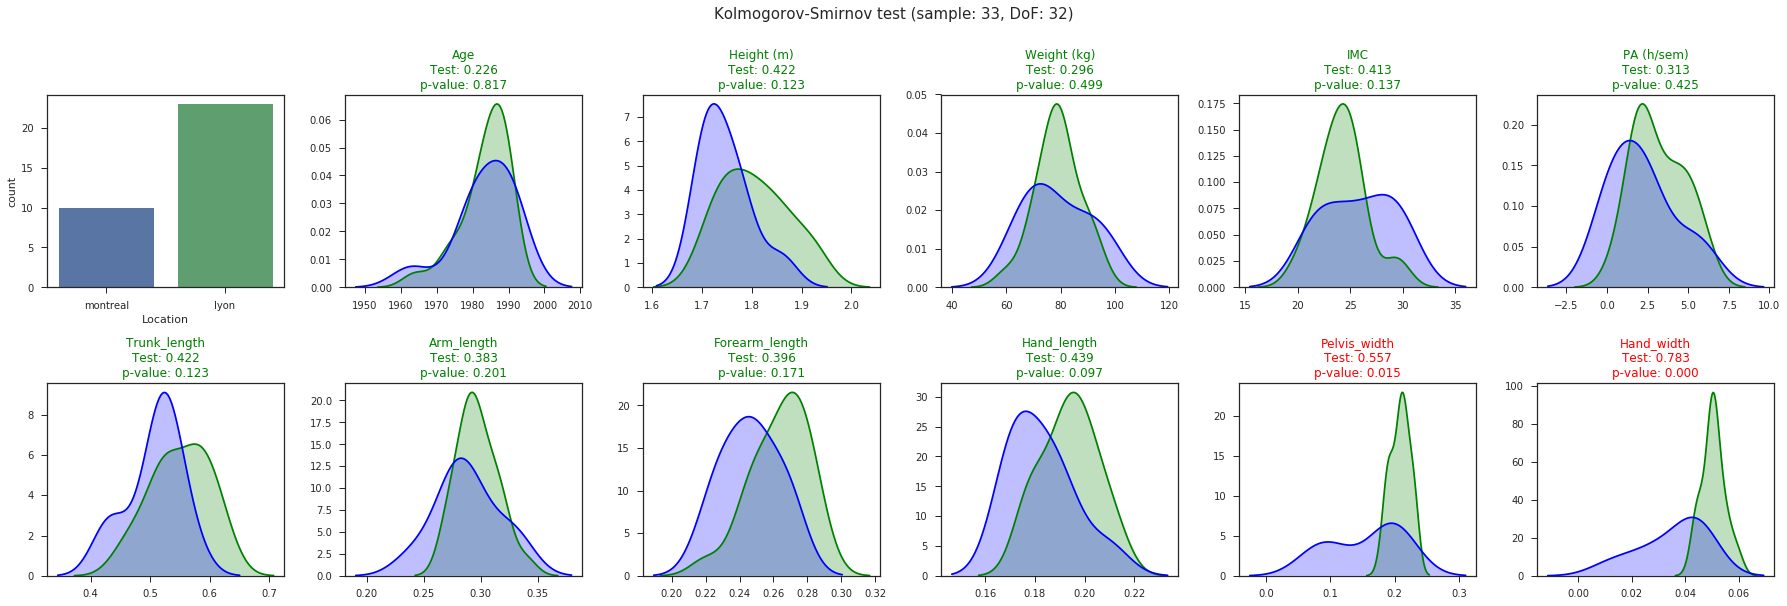

In [100]:
fig, axs = plt.subplots(2, 6, figsize=(25, 8))
# get numeric columns
numeric_col = df.dtypes[df.dtypes != "object"].index 

for ivar, ax in zip(df.drop('Laterality', axis=1), axs.ravel()) :
    if ivar in numeric_col:
        lyon = df[df['Location'] == 'lyon'][ivar]
        montreal = df[df['Location'] == 'montreal'][ivar]
        # normality test
        test = scipy.stats.ks_2samp(lyon, montreal)
        color = 'g' if test[1] > 0.05 else 'r'
        ax.set_title('{}\nTest: {:.3f}\np-value: {:.3f}'.format(ivar, test[0], test[1]), color=color)
        sns.kdeplot(lyon, shade=True, color="g", ax=ax)
        sns.kdeplot(montreal, shade=True, color="b", ax=ax)
        ax.legend_.remove()
    else:
        sns.countplot(x=ivar, data=df, ax=ax)
        
fig.tight_layout()
fig.suptitle('Kolmogorov-Smirnov test (sample: {}, DoF: {})'.format(df[ivar].size, df[ivar].size - 1), y=1.05, fontsize=15)
plt.show()

## Summary
- The Kolmogorov-Smirnov test reject equal distribution between Montréal and Lyon samples only for the `Pelvis_width` and `Hand_width`

# 3. Outliers
- [link](https://plot.ly/python/outlier-test/)